In [1]:
!pip install shapely
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [3]:
#Importar un archivo CSV

# Cargar el archivo CSV
df_csv = pd.read_csv("electric_vehicle_data.csv")

# Mostrar las primeras filas del archivo importado
print(df_csv.head())

# Mostrar la estructura del DataFrame
print(df_csv.info())

# Mostrar un resumen estadístico de las variables numéricas
print(df_csv.describe())

   VIN (1-10)    County     City State  Postal Code  Model Year     Make  \
0  5YJ3E1EBXK      King  Seattle    WA      98178.0        2019    TESLA   
1  5YJYGDEE3L    Kitsap  Poulsbo    WA      98370.0        2020    TESLA   
2  KM8KRDAF5P    Kitsap   Olalla    WA      98359.0        2023  HYUNDAI   
3  5UXTA6C0XM    Kitsap  Seabeck    WA      98380.0        2021      BMW   
4  JTMAB3FV7P  Thurston  Rainier    WA      98576.0        2023   TOYOTA   

        Model                   Electric Vehicle Type  \
0     MODEL 3          Battery Electric Vehicle (BEV)   
1     MODEL Y          Battery Electric Vehicle (BEV)   
2     IONIQ 5          Battery Electric Vehicle (BEV)   
3          X5  Plug-in Hybrid Electric Vehicle (PHEV)   
4  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible           220.0   
1            Clean Alternative Fuel Vehicle Eligible    

In [4]:
# VIN debe ser el índice de DataFrame

#Lo solucionamos: 

df_csv = df_csv.set_index("VIN (1-10)")

# Confirme si el índice se configuró correctamente
print(df_csv.head())

print(df_csv.describe())

              County     City State  Postal Code  Model Year     Make  \
VIN (1-10)                                                              
5YJ3E1EBXK      King  Seattle    WA      98178.0        2019    TESLA   
5YJYGDEE3L    Kitsap  Poulsbo    WA      98370.0        2020    TESLA   
KM8KRDAF5P    Kitsap   Olalla    WA      98359.0        2023  HYUNDAI   
5UXTA6C0XM    Kitsap  Seabeck    WA      98380.0        2021      BMW   
JTMAB3FV7P  Thurston  Rainier    WA      98576.0        2023   TOYOTA   

                 Model                   Electric Vehicle Type  \
VIN (1-10)                                                       
5YJ3E1EBXK     MODEL 3          Battery Electric Vehicle (BEV)   
5YJYGDEE3L     MODEL Y          Battery Electric Vehicle (BEV)   
KM8KRDAF5P     IONIQ 5          Battery Electric Vehicle (BEV)   
5UXTA6C0XM          X5  Plug-in Hybrid Electric Vehicle (PHEV)   
JTMAB3FV7P  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   

            Clean Alterna

In [5]:
#  Detectar y tratar los datos ausentes es una parte crucial en el proceso de limpieza de datos. 
# Detectar valores nulos en todo el DataFrame
print(df_csv.isnull().sum())

County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        36
Base MSRP                                             36
Legislative District                                 494
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64


In [6]:
#Copia del csv por si queremos recuperar después
df_csv2 = df_csv.copy()


In [7]:

#Eliminamos los valores nulos
df_csv2= df_csv2.dropna()
#Comprobamos que se hallan borrandonoslas los campos nulos y a partir de ahora trabajamos con la copia
print(df_csv2.isnull().sum())

County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [8]:
# Comprobar el tipo de dato de cada columna 
df_csv2.dtypes

County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract                                    float64
dtype: object

In [9]:
#Verificar el tipo de datos de "Vehicle Location"
print(type(df_csv2['Vehicle Location'].iloc[0]))

#Conversión a "Point"
from shapely.wkt import loads as wkt_loads

df_csv2['Vehicle Location'] = df_csv2['Vehicle Location'].apply(
    lambda x: wkt_loads(x) if pd.notnull(x) else None
)

print(type(df_csv2['Vehicle Location'].iloc[0]))

<class 'str'>
<class 'shapely.geometry.point.Point'>


In [10]:

#Cambiar el tipo de CP a string en vez de float
df_csv2['Postal Code'] = df_csv2['Postal Code'].apply(
    lambda x: str(int(x)) if pd.notnull(x) else ''
)

#El Census Tract es una cadena de caracteres identificativos de una subdivision de un condado de EEUU, 
#que al igual que el CP, no haremos operaciones matematicas sobre ella por lo que lo pasamos como string
df_csv2['2020 Census Tract'] = df_csv2['2020 Census Tract'].apply(
    lambda x: str(int(x)) if pd.notnull(x) else ''
)

#Lo mismo con el identificador del distrito
df_csv2['Legislative District'] = df_csv2['Legislative District'].apply(
    lambda x: str(int(x)) if pd.notnull(x) else ''
)

df_csv2['DOL Vehicle ID'] = df_csv2['DOL Vehicle ID'].apply(
    lambda x: str(int(x)) if pd.notnull(x) else ''
)

#Cambiar a enterno sin decimales
df_csv2['Electric Range'] = df_csv2['Electric Range'].apply(lambda x: int(x) if pd.notnull(x) else None)
df_csv2['Base MSRP'] = df_csv2['Base MSRP'].apply(lambda x: int(x) if pd.notnull(x) else None)



In [11]:
# Comprobar el tipo de dato de cada columna 
df_csv2.dtypes

County                                               object
City                                                 object
State                                                object
Postal Code                                          object
Model Year                                            int64
Make                                                 object
Model                                                object
Electric Vehicle Type                                object
Clean Alternative Fuel Vehicle (CAFV) Eligibility    object
Electric Range                                        int64
Base MSRP                                             int64
Legislative District                                 object
DOL Vehicle ID                                       object
Vehicle Location                                     object
Electric Utility                                     object
2020 Census Tract                                    object
dtype: object

In [12]:

# Mostrar las primeras filas del archivo importado
print(df_csv2.head())

              County     City State Postal Code  Model Year     Make  \
VIN (1-10)                                                             
5YJ3E1EBXK      King  Seattle    WA       98178        2019    TESLA   
5YJYGDEE3L    Kitsap  Poulsbo    WA       98370        2020    TESLA   
KM8KRDAF5P    Kitsap   Olalla    WA       98359        2023  HYUNDAI   
5UXTA6C0XM    Kitsap  Seabeck    WA       98380        2021      BMW   
JTMAB3FV7P  Thurston  Rainier    WA       98576        2023   TOYOTA   

                 Model                   Electric Vehicle Type  \
VIN (1-10)                                                       
5YJ3E1EBXK     MODEL 3          Battery Electric Vehicle (BEV)   
5YJYGDEE3L     MODEL Y          Battery Electric Vehicle (BEV)   
KM8KRDAF5P     IONIQ 5          Battery Electric Vehicle (BEV)   
5UXTA6C0XM          X5  Plug-in Hybrid Electric Vehicle (PHEV)   
JTMAB3FV7P  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   

            Clean Alternative Fu

In [13]:
# Identificar datos atípicos y su tratamiento para evitar que puedan distorsionar futuros análisis estadísticos


# Parte I: Variables numéricas

# Seleccionamos solo las columnas numéricas
numerical_cols = df_csv2.select_dtypes(include=[np.number]).columns
print(numerical_cols)

Index(['Model Year', 'Electric Range', 'Base MSRP'], dtype='object')


In [14]:
# Usamos el rango intercuartílico (IQR)
# IQR es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). Los valores que caen fuera de este rango son considerados atípicos.

def identify_outliers_iqr(df, numerical_cols):
    outliers = {}
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identificar los outliers
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Identificar outliers usando el método IQR
outliers_iqr = identify_outliers_iqr(df_csv2, numerical_cols)
print("\nDatos atípicos identificados por IQR:")
for col, data in outliers_iqr.items():
    print(f"{col}: {data.shape[0]} outliers")


Datos atípicos identificados por IQR:
Model Year: 6445 outliers
Electric Range: 38660 outliers
Base MSRP: 3241 outliers


In [15]:
#Momentáneamente no vamos a eliminar los datos atípicos de Model Year porque son fechas y nos permite estudiar la evolucion de ventas de
#coches a lo largo del tiempo 

print("Mínimo Model Year:", df_csv2['Model Year'].min())
print("Máximo Model Year:", df_csv2['Model Year'].max())
print("\n")

print("Mínimo Electric Range:", df_csv2['Electric Range'].min())
print("Máximo Electric Range:", df_csv2['Electric Range'].max())
print("\n")

#No vamos a eliminar los datos atípicos del MSRP porque son muchos y no usamos esta informacion en nuestro análisis
print("Precio de venta sugerido por el fabricante:")
print("Mínimo Base MSRP:", df_csv2['Base MSRP'].min())
print("Máximo Base MSRP:", df_csv2['Base MSRP'].max())


Mínimo Model Year: 2000
Máximo Model Year: 2025


Mínimo Electric Range: 0
Máximo Electric Range: 337


Precio de venta sugerido por el fabricante:
Mínimo Base MSRP: 0
Máximo Base MSRP: 845000


In [16]:
#Subset copia
df_csv3=df_csv2.copy()

# Eliminar filas donde 'Electric Range' sea 0 porque no hay informacion de ella
df_csv3 = df_csv3[df_csv3['Electric Range'] != 0]

In [17]:
# Calcular la autonomía promedio por marca
media_autonomia = df_csv3.groupby('Make')['Electric Range'].mean()

# Obtener las 10 marcas con mayor autonomía
top_10_autonomia = media_autonomia.sort_values(ascending=False).head(10)

# Encontrar el año con más registros para cada una de esas marcas
años_max_ventas = (
    df_csv3[df_csv3['Make'].isin(top_10_autonomia.index)]
    .groupby(['Make', 'Model Year'])
    .size()
    .reset_index(name='Cantidad')
    .sort_values(['Make', 'Cantidad'], ascending=[True, False])
    .drop_duplicates(subset='Make')
    .set_index('Make')
)

# Unir los datos de autonomía con el año de mayor cantidad
resultado = top_10_autonomia.to_frame(name='Autonomía Promedio').join(años_max_ventas)

# Mostrar el resultado
print(resultado)

                      Autonomía Promedio  Model Year  Cantidad
Make                                                          
TESLA                         241.070140        2018      7903
JAGUAR                        234.000000        2019       110
POLESTAR                      233.000000        2021       162
CHEVROLET                     146.510286        2017      2960
VOLKSWAGEN                    107.477081        2019       525
NISSAN                        105.508098        2013      1772
WHEEGO ELECTRIC CARS          100.000000        2010         2
TH!NK                         100.000000        2011         5
PORSCHE                        93.409836        2020       181
FIAT                           85.693277        2015       219


In [18]:
def codificar_model_year(año):
    if 2001 <= año <= 2006:
        return 1
    elif 2007 <= año <= 2012:
        return 2
    elif 2013 <= año <= 2018:
        return 3
    elif 2019 <= año <= 2024:
        return 4

# Aplicar codificación
df_csv3['ModelYear_Codificado'] = df_csv3['Model Year'].apply(codificar_model_year)
df_csv3

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,ModelYear_Codificado
VIN (1-10),,,,,,,,,,,,,,,,,
5YJ3E1EBXK,King,Seattle,WA,98178,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,37,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033011902,4.0
5YJYGDEE3L,Kitsap,Poulsbo,WA,98370,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,23,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,53035091100,4.0
5UXTA6C0XM,Kitsap,Seabeck,WA,98380,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,35,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,53035091301,4.0
JTMAB3FV7P,Thurston,Rainier,WA,98576,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,2,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,53067012530,4.0
5YJSA1DN0C,Thurston,Olympia,WA,98502,2012,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,265,59900,22,186637195,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,53067010600,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WA1F2AFY7M,Whatcom,Blaine,WA,98230,2021,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,18,0,42,171206003,POINT (-122.74888 48.99404),CITY OF BLAINE - (WA)||PUD NO 1 OF WHATCOM COUNTY,53073010409,4.0
1G1RD6E42E,Pierce,Graham,WA,98338,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,2,106661334,POINT (-122.29477 47.05703),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,53053073124,3.0
1C4RJXN62R,Pierce,Tacoma,WA,98407,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,27,267004272,POINT (-122.51134 47.29238),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,53053060904,4.0


In [19]:
df_csv3['ModelYear_Codificado'].value_counts().sort_index()

ModelYear_Codificado
1.0        3
2.0     2211
3.0    40435
4.0    50693
Name: count, dtype: int64

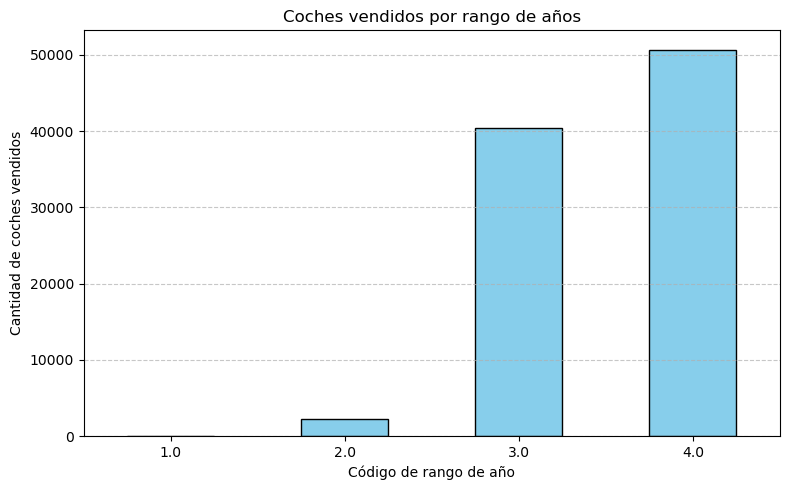

In [20]:

# Contar coches por código de año
conteo = df_csv3['ModelYear_Codificado'].value_counts().sort_index()

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
conteo.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Coches vendidos por rango de años')
plt.xlabel('Código de rango de año')
plt.ylabel('Cantidad de coches vendidos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [21]:
# Parte II: Variables NO Numéricas 

non_numeric_columns = df_csv2.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)
# Columnas a eliminar
columns_to_exclude = ['City', 'State', 'Model','DOL Vehicle ID','Vehicle Location','2020 Census Tract','Electric Utility','Postal Code']

# Filtrar
non_numeric_columns = [col for col in non_numeric_columns if col not in columns_to_exclude]

Index(['County', 'City', 'State', 'Postal Code', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
       'Legislative District', 'DOL Vehicle ID', 'Vehicle Location',
       'Electric Utility', '2020 Census Tract'],
      dtype='object')


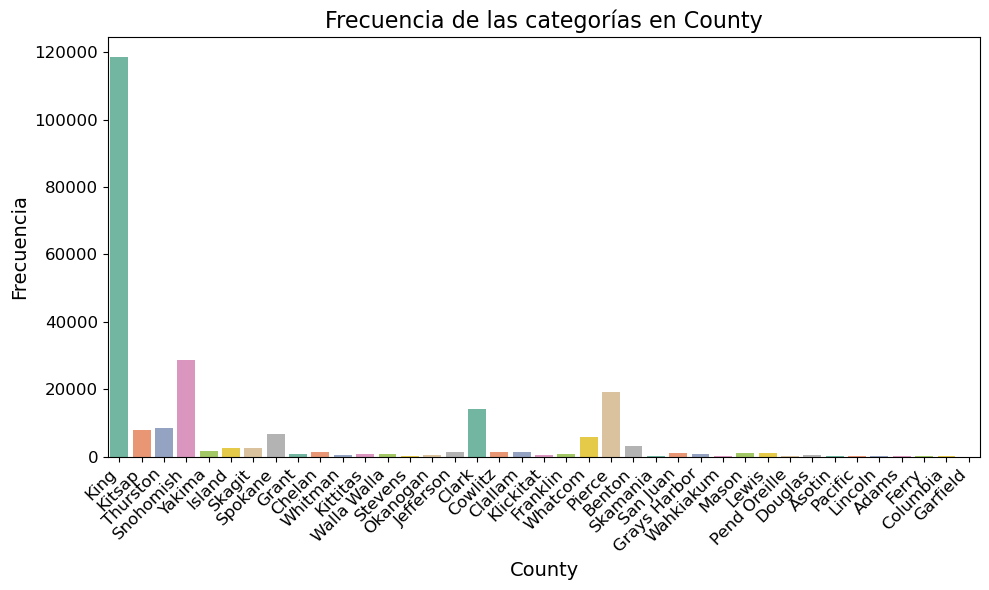

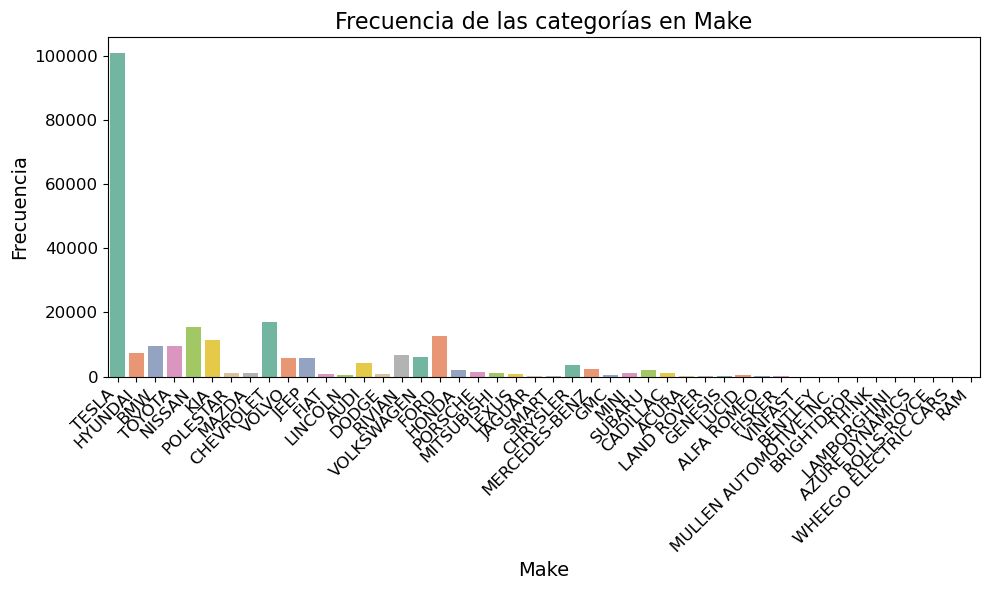

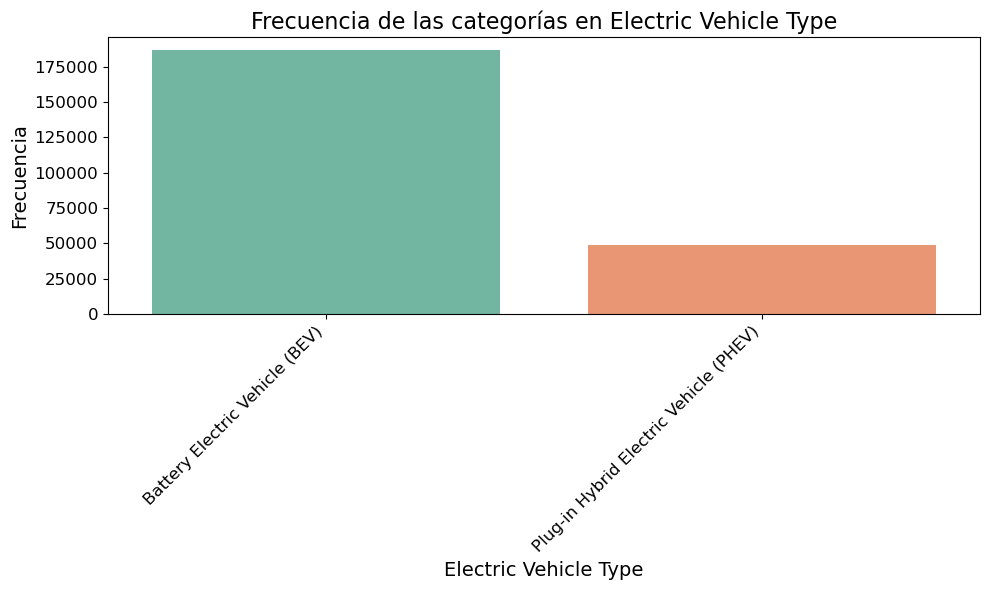

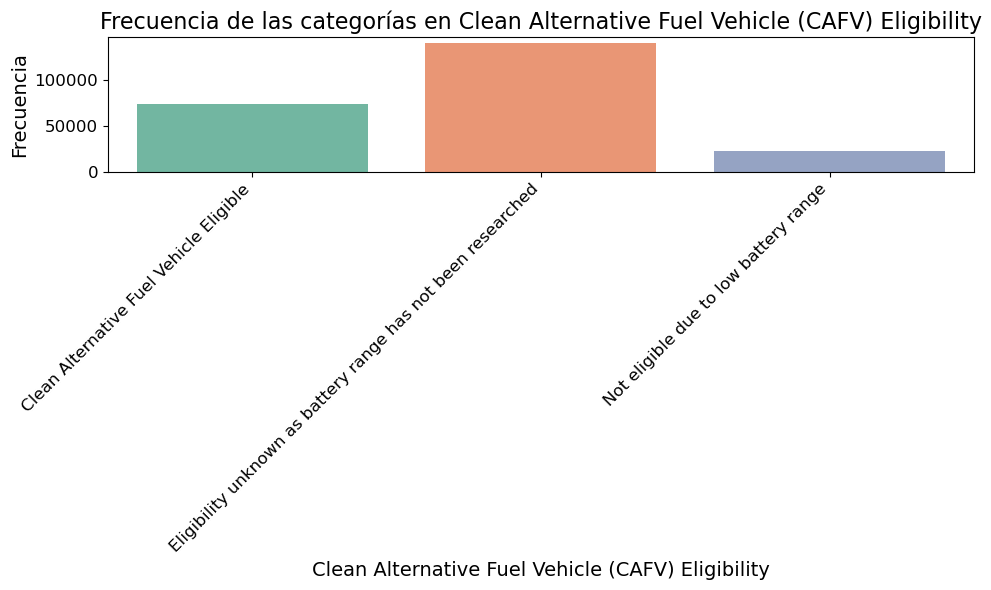

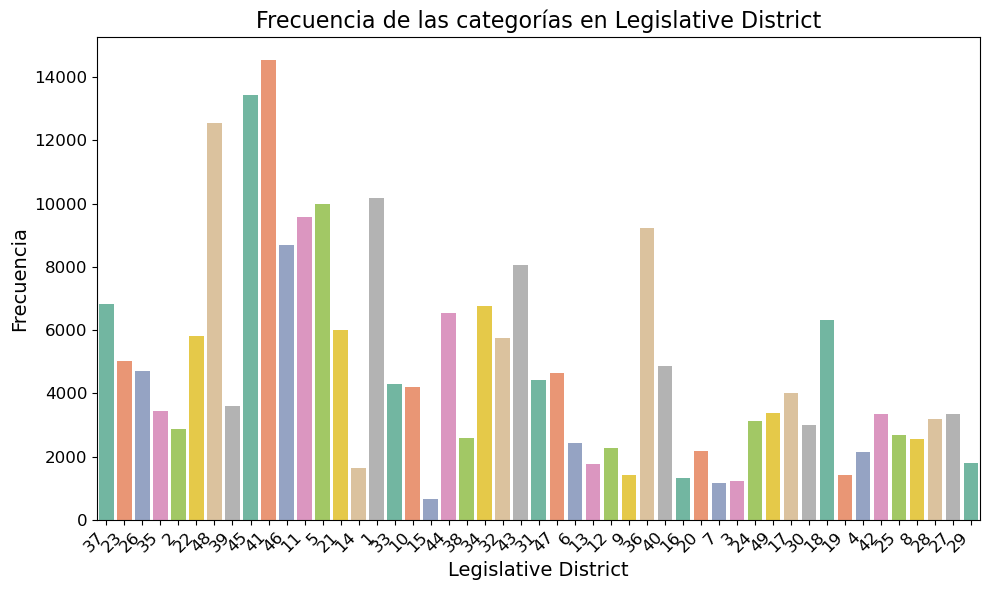

In [22]:
# Generar gráficos para cada columna no numérica
for col in non_numeric_columns:
    # Contar la frecuencia de las categorías
    plt.figure(figsize=(10, 6))
    #sns.countplot(x=col, data=df_csv2, palette="Set2")
    sns.countplot(x=col, data=df_csv2, hue=col, palette="Set2", legend=False)

    
    # Título y formato
    plt.title(f'Frecuencia de las categorías en {col}', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    
    # Etiquetas y formato del gráfico
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()


                      Model Year  Electric Range  Base MSRP  \
Model Year              1.000000       -0.193572  -0.203051   
Electric Range         -0.193572        1.000000   0.039182   
Base MSRP              -0.203051        0.039182   1.000000   
ModelYear_Codificado    0.835236        0.006527  -0.151627   

                      ModelYear_Codificado  
Model Year                        0.835236  
Electric Range                    0.006527  
Base MSRP                        -0.151627  
ModelYear_Codificado              1.000000  


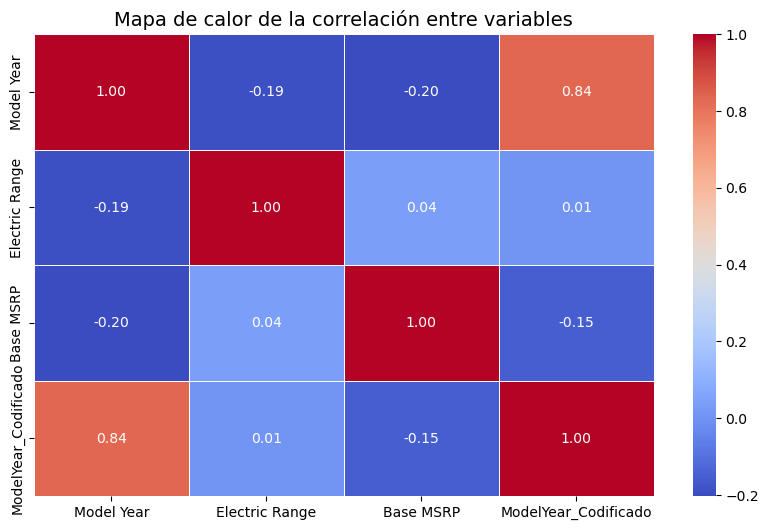

In [23]:
correlation_matrix = df_csv3.select_dtypes(include=['number']).corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

# Visualizar la matriz de correlación con un heatmap (MAPA DE COLOR)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de la correlación entre variables", fontsize=14)
plt.show()

<Figure size 1400x800 with 0 Axes>

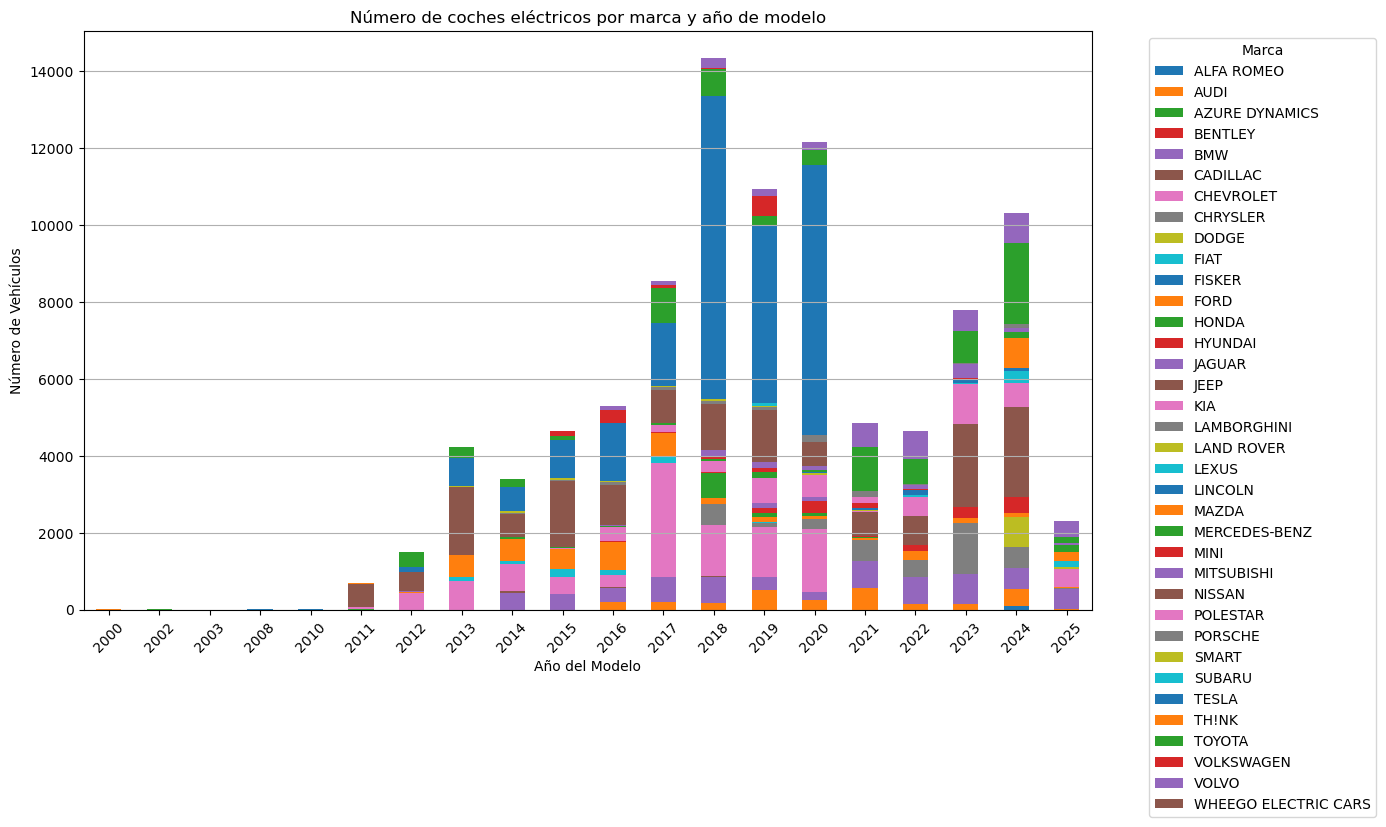

In [24]:
# Agrupar por 'Model Year' y 'Make', y contar el número de registros
ventas_por_año_y_marca = df_csv3.groupby(['Model Year', 'Make']).size().unstack(fill_value=0)

# Crear la gráfica de barras apiladas
plt.figure(figsize=(14, 8))
ventas_por_año_y_marca.plot(kind='bar', stacked=True, figsize=(14, 8))

# Añadir títulos y etiquetas
plt.title('Número de coches eléctricos por marca y año de modelo')
plt.xlabel('Año del Modelo')
plt.ylabel('Número de Vehículos')
plt.xticks(rotation=45)
plt.legend(title='Marca', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()

# Mostrar la gráfica
plt.show()

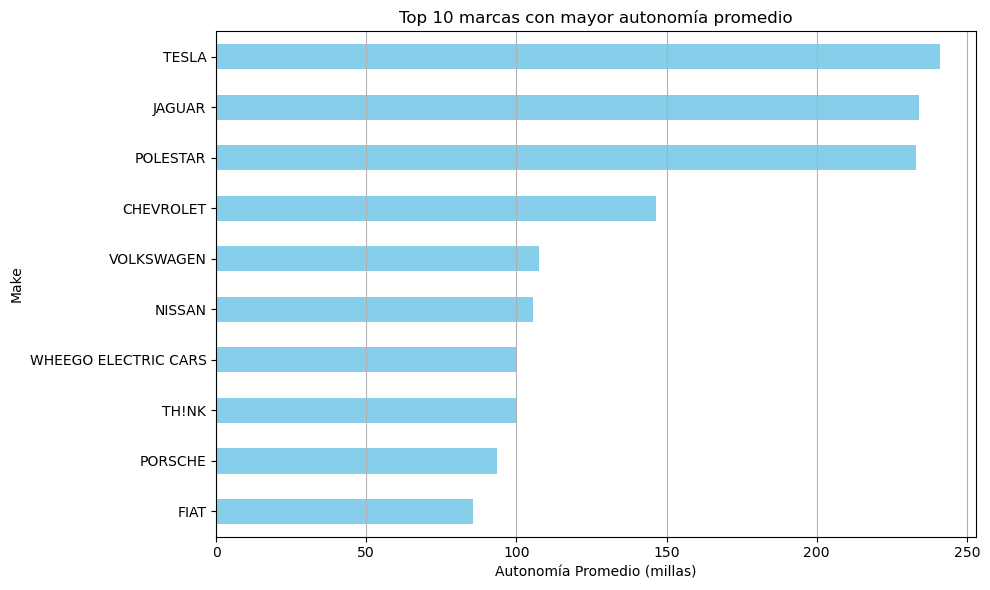

In [25]:
# Agrupar por 'Make' y calcular la media de autonomía eléctrica
media_autonomia_por_marca = df_csv3.groupby('Make')['Electric Range'].mean().sort_values(ascending=False)

# Mostrar las 10 marcas con mayor autonomía promedio
top_10 = media_autonomia_por_marca.head(10)

# Graficar
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color='skyblue')
plt.xlabel('Autonomía Promedio (millas)')
plt.title('Top 10 marcas con mayor autonomía promedio')
plt.gca().invert_yaxis()  # Para que el más alto esté arriba
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [ ]:
df_csv3.describe()

In [ ]:
# Medidas de frecuencia: 
#Tabla de frecuencia para una variable categórica (ejemplo: 'ModelYear_Codificado')
variable_categorica = 'ModelYear_Codificado' 
frecuencia = df_csv3[variable_categorica].value_counts()
porcentaje = df_csv3[variable_categorica].value_counts(normalize=True) * 100
frecuencia_df = pd.DataFrame({'Frecuencia': frecuencia, 'Porcentaje': porcentaje})
frecuencia_df
# No olvidemos que cada código representa:
# 1 = De 2001 a 2006
# 2 = De 2007 a 2012
# 3 = De 2013 a 2018
# 4 = De 2019 a 2024